<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Market Basket Analysis - Clustering</h3>
</div>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load and Prepare Data

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
# Gender count
gender_count = df['Gender'].value_counts()
gender_count

Gender
Female    112
Male       88
Name: count, dtype: int64

In [12]:
# Mean annual income by gender
mean_income_by_gender = df.groupby('Gender')['Annual Income (k$)'].mean()
mean_income_by_gender

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [13]:
# Mean annual income by age
mean_income_by_age = df.groupby('Age')['Annual Income (k$)'].mean()
mean_income_by_age

Age
18     51.250000
19     57.000000
20     41.600000
21     38.800000
22     31.333333
23     41.500000
24     39.250000
25     57.666667
26     58.000000
27     63.166667
28     85.250000
29     63.600000
30     76.142857
31     48.375000
32     87.181818
33     80.333333
34     79.000000
35     46.666667
36     81.000000
37     65.000000
38     74.500000
39     72.666667
40     61.666667
41    101.000000
42     60.000000
43     65.666667
44     75.500000
45     69.333333
46     59.000000
47     70.166667
48     58.200000
49     51.000000
50     58.600000
51     55.500000
52     55.500000
53     39.500000
54     59.750000
55     57.000000
56     79.000000
57     64.500000
58     54.000000
59     65.250000
60     43.333333
63     56.500000
64     19.000000
65     50.500000
66     63.000000
67     45.500000
68     56.666667
69     44.000000
70     47.500000
Name: Annual Income (k$), dtype: float64

In [14]:
# Define age bins and labels for grouping
age_bins = [18, 25, 35, 45, 55, 70]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-70']

# Add a new column for age groups based on the bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate mean annual income by age group
mean_income_by_age_group = df.groupby('Age Group')['Annual Income (k$)'].mean()

mean_income_by_age_group

Age Group
18-24    44.657143
25-34    71.148148
35-44    66.809524
45-54    58.641026
55-70    54.250000
Name: Annual Income (k$), dtype: float64

In [15]:
# Mean spending score by gender
mean_spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean()
mean_spending_by_gender

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [16]:
# Mean spending score by annual income
mean_spending_by_income = df.groupby('Annual Income (k$)')['Spending Score (1-100)'].mean()
mean_spending_by_income

Annual Income (k$)
15     60.0
16     41.5
17     58.0
18     50.0
19     47.0
       ... 
103    48.5
113    49.5
120    47.5
126    51.0
137    50.5
Name: Spending Score (1-100), Length: 64, dtype: float64

In [17]:
# Calculate mean spending score by age group using the same age bins
mean_spending_by_age_group = df.groupby('Age Group')['Spending Score (1-100)'].mean()
mean_spending_by_age_group

Age Group
18-24    56.257143
25-34    63.166667
35-44    49.428571
45-54    36.230769
55-70    37.857143
Name: Spending Score (1-100), dtype: float64

In [18]:
# Calculate the maximum and minimum values for income, age, and spending score
max_income = df['Annual Income (k$)'].max()
min_income = df['Annual Income (k$)'].min()

max_age = df['Age'].max()
min_age = df['Age'].min()

max_spending_score = df['Spending Score (1-100)'].max()
min_spending_score = df['Spending Score (1-100)'].min()

# Calculate the mode (most frequent value) for age and spending score
mode_age = df['Age'].mode()[0]
mode_spending_score = df['Spending Score (1-100)'].mode()[0]

In [19]:
print("Max income is: ", max_income)
print("Min income is: ", min_income)
print("Max Age is: ", max_age)
print("Min Age is: ", min_age)
print("Max Spending Score is: ", max_spending_score)
print("Min Spending Score is: ", min_spending_score)
print("Age Mode is: ", mode_age)
print("Spending Score Mode is: ", mode_spending_score)

Max income is:  137
Min income is:  15
Max Age is:  70
Min Age is:  18
Max Spending Score is:  99
Min Spending Score is:  1
Age Mode is:  32
Spending Score Mode is:  42


## Data Preprocessing

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,1,Male,19,15,39,18-24
1,2,Male,21,15,81,18-24
2,3,Female,20,16,6,18-24
3,4,Female,23,16,77,18-24
4,5,Female,31,17,40,25-34


In [21]:
# Drop the 'CustomerID' and 'Age Group' columns from the dataset
df = df.drop(columns=['CustomerID', 'Age Group'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
# Create two new columns: 'Male' and 'Female', based on the 'Gender' column
df['Male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Female'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Drop the original 'Gender' column
df = df.drop(columns=['Gender'])

# Display the first few rows of the updated dataset
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1


In [23]:
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Male                      0
Female                    0
dtype: int64

## Strorytelling - Visualization

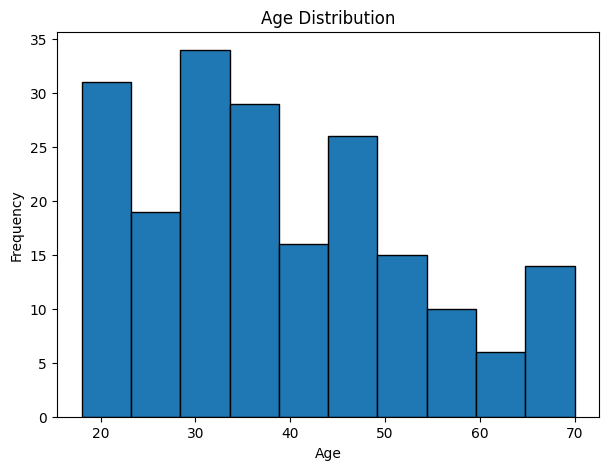

In [24]:
# 1. Histogram of Age Distribution
plt.figure(figsize=(7, 5))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

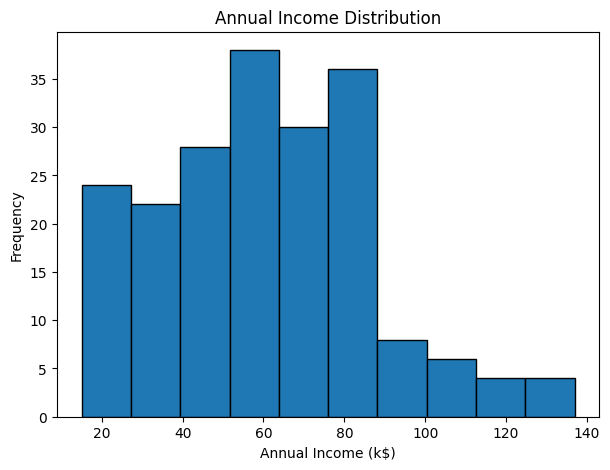

In [25]:
# 2. Histogram of Annual Income Distribution
plt.figure(figsize=(7, 5))
plt.hist(df['Annual Income (k$)'], bins=10, edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

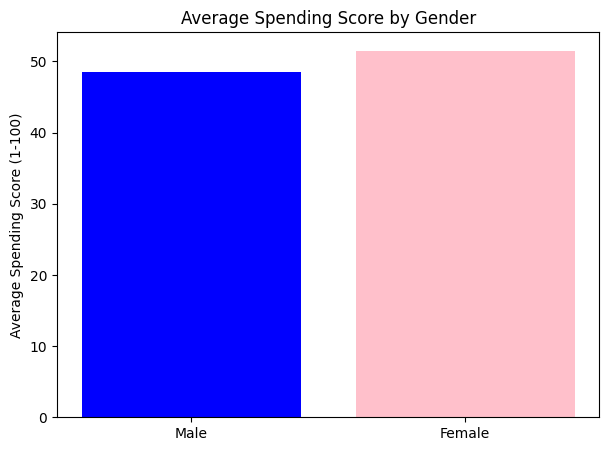

In [26]:
# 3. Bar Chart of Average Spending Score by Gender
plt.figure(figsize=(7, 5))
plt.bar(['Male', 'Female'], 
        [df[df['Male'] == 1]['Spending Score (1-100)'].mean(),
         df[df['Female'] == 1]['Spending Score (1-100)'].mean()],
        color=['blue', 'pink'])
plt.title('Average Spending Score by Gender')
plt.ylabel('Average Spending Score (1-100)')
plt.show()

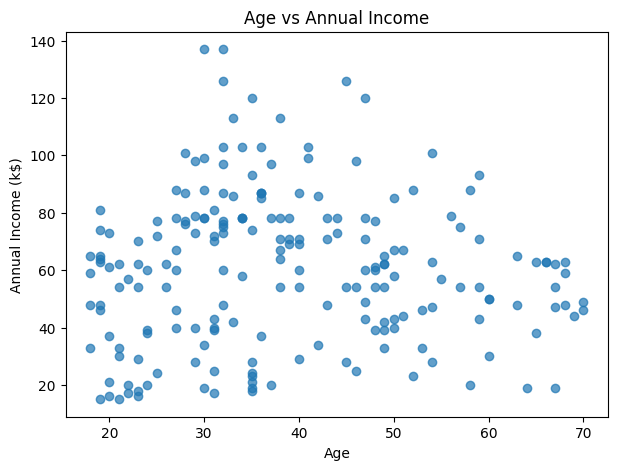

In [27]:
# 4. Scatter plot of Age vs Annual Income
plt.figure(figsize=(7, 5))
plt.scatter(df['Age'], df['Annual Income (k$)'], alpha=0.7)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

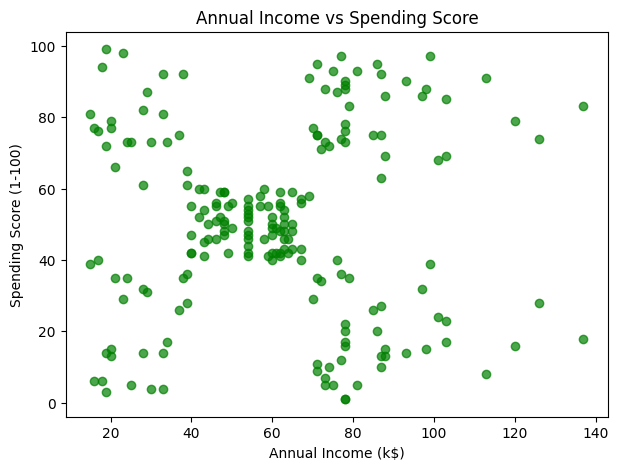

In [28]:
# 5. Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(7, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.7, c='green')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

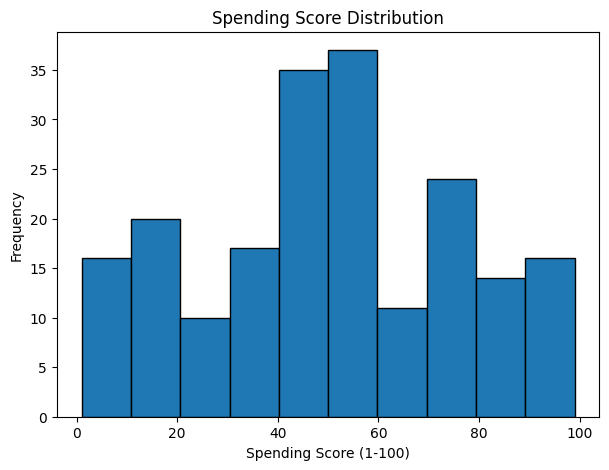

In [29]:
#6. Histogram of Spending Score Distribution
plt.figure(figsize=(7, 5))
plt.hist(df['Spending Score (1-100)'], bins=10, edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

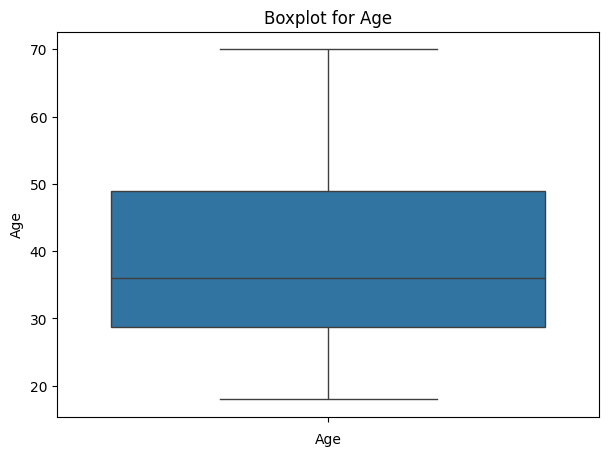

In [30]:
# 1. Boxplot for Age
plt.figure(figsize=(7, 5))
sns.boxplot(data=df['Age'])
plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()

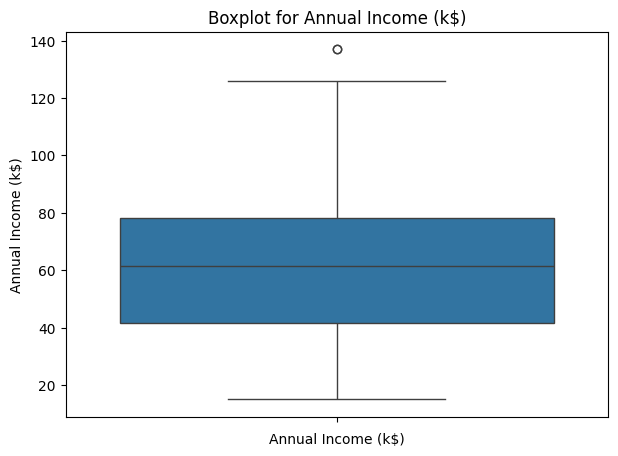

In [31]:
# 2. Boxplot for Annual Income
plt.figure(figsize=(7, 5))
sns.boxplot(data=df['Annual Income (k$)'])
plt.title('Boxplot for Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.show()

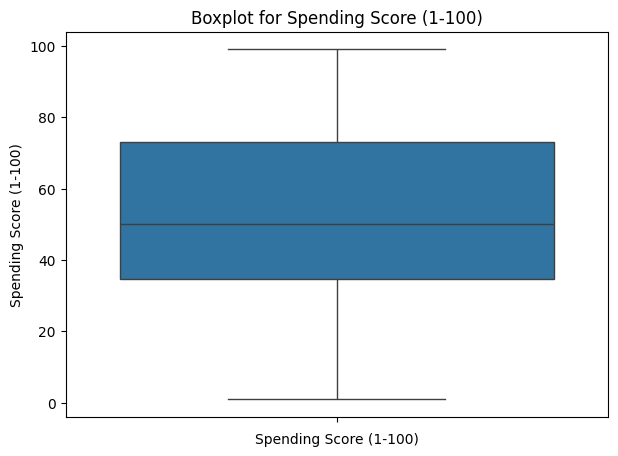

In [32]:
# 3. Boxplot for Spending Score
plt.figure(figsize=(7, 5))
sns.boxplot(data=df['Spending Score (1-100)'])
plt.title('Boxplot for Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.show()

## Trani the Model (Clustering)

#### Calculate the correlation matrix for numerical features

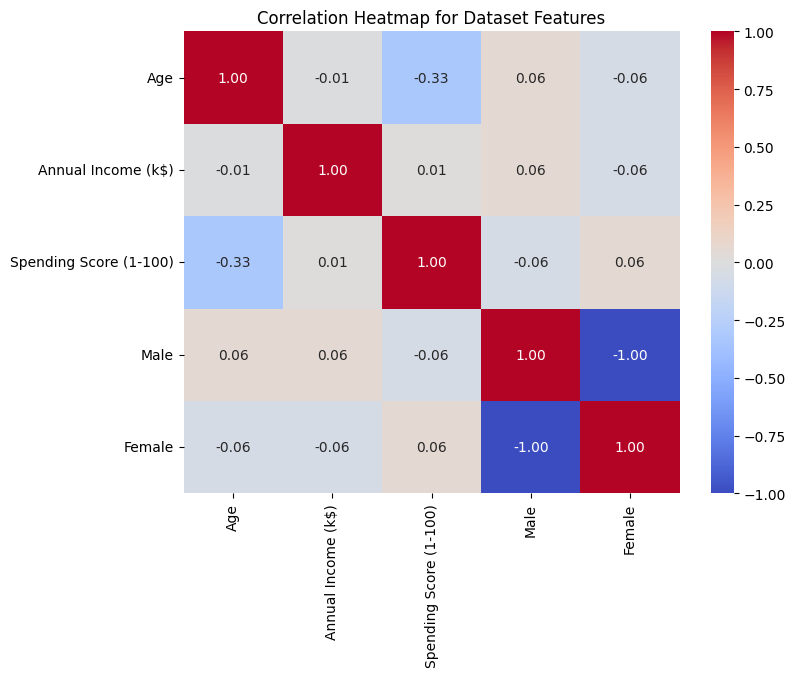

In [33]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Dataset Features")
plt.show()

#### K-Means Clustering

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting the relevant features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features for better clustering performance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [35]:
# Finding the optimal number of clusters using the Elbow method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

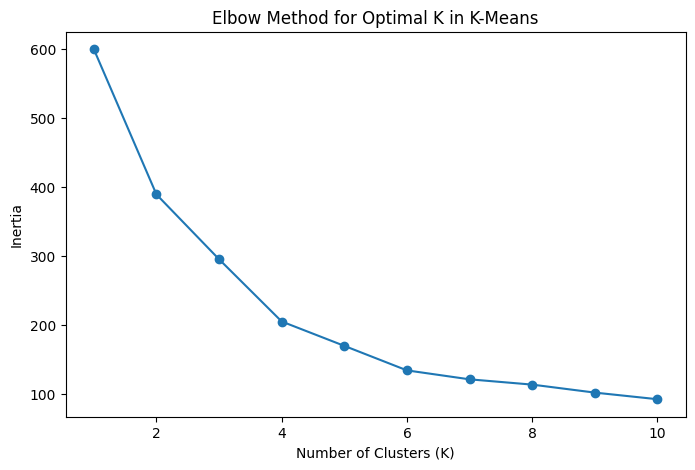

In [36]:
# Plotting the Elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

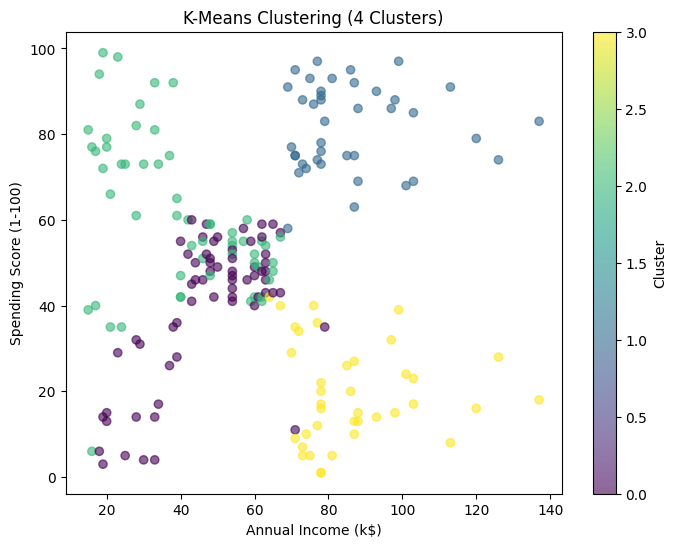

In [37]:
# Apply K-Means clustering with the chosen number of clusters (4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Plotting the clustering results on a scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering (4 Clusters)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.colorbar(label='Cluster')
plt.show()

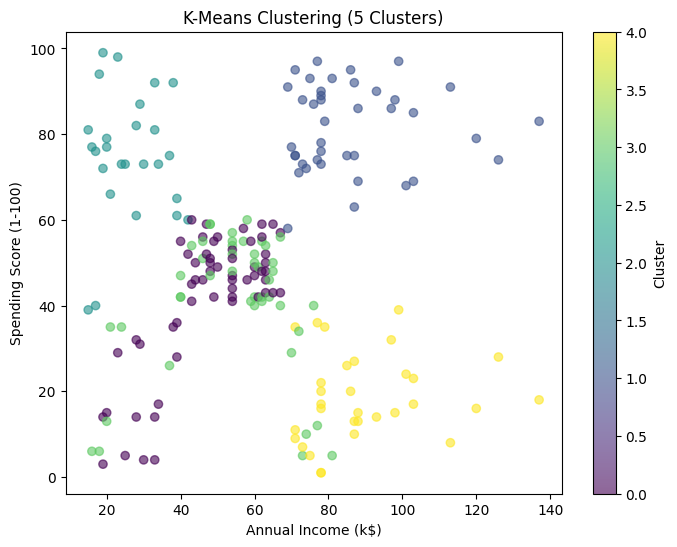

In [38]:
# Apply K-Means clustering with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df['Cluster_5'] = kmeans_5.fit_predict(features_scaled)

# Plotting the clustering results on a scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster_5'], cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering (5 Clusters)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.colorbar(label='Cluster')
plt.show()

#### DBSCAN Clustering

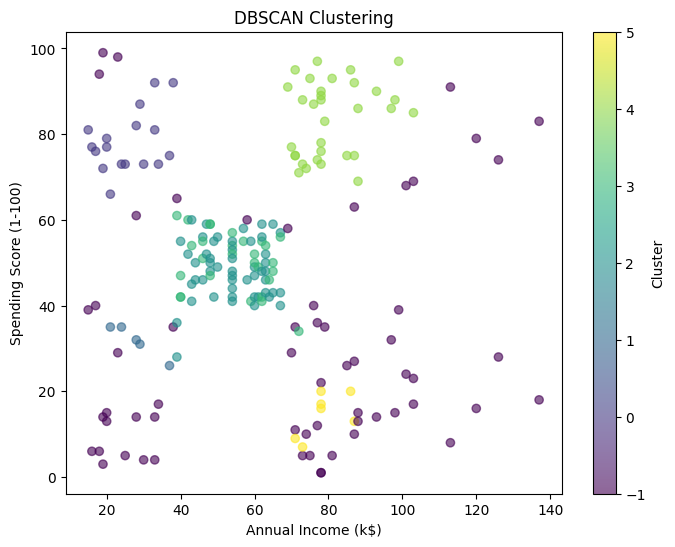

DBSCAN_Cluster
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64

In [39]:
from sklearn.cluster import DBSCAN

# DBSCAN requires tuning of two main parameters: eps and min_samples
# eps (maximum distance between two samples to be considered as neighbors)
# min_samples (minimum number of samples in a neighborhood for a point to be considered as a core point)

# Applying DBSCAN with an initial guess for eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(features_scaled)

# Visualizing DBSCAN clustering result
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN_Cluster'], cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.colorbar(label='Cluster')
plt.show()

# Checking the number of clusters and noise points (labeled as -1)
dbscan_labels = df['DBSCAN_Cluster'].value_counts()
dbscan_labels

* Clustering with DBSCAN was performed. Based on the selected parameters, a total of 7 clusters were identified, where cluster -1 represents **noise** (data points that do not belong to any cluster) and includes 60 samples.

* This method is suitable for data with varying densities and can identify more complex patterns, but it requires tuning the parameters **eps** and **min_samples**.

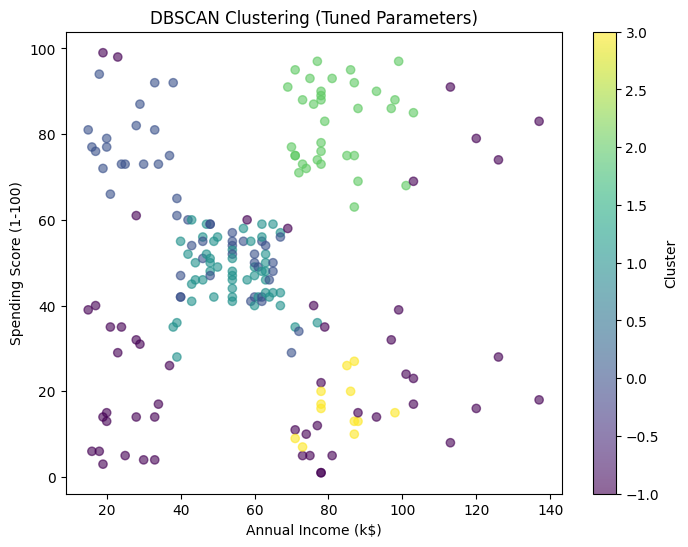

DBSCAN_Cluster_Tuned
-1    52
 1    52
 0    50
 2    34
 3    12
Name: count, dtype: int64

In [40]:
# Adjusting DBSCAN parameters: experimenting with different eps and min_samples values to improve clustering
# Setting a slightly higher eps value and a higher min_samples to reduce noise and potentially capture better clusters

# New parameters
dbscan_tuned = DBSCAN(eps=0.6, min_samples=8)
df['DBSCAN_Cluster_Tuned'] = dbscan_tuned.fit_predict(features_scaled)

# Visualizing the result of DBSCAN with tuned parameters
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN_Cluster_Tuned'], cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering (Tuned Parameters)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.colorbar(label='Cluster')
plt.show()

# Checking the number of clusters and noise points in the tuned result
dbscan_tuned_labels = df['DBSCAN_Cluster_Tuned'].value_counts()
dbscan_tuned_labels

With the parameters set to eps = 0.6 and min_samples = 8, the DBSCAN clustering results have improved. In this configuration, the number of noise points has been reduced to 52 samples, and 4 main clusters have been identified:

- Cluster -1 (Noise): 52 samples
- Cluster 0: 50 samples
- Cluster 1: 52 samples
- Cluster 2: 34 samples
- Cluster 3: 12 samples

These settings provide a better division of data and reduce noise.
